# Import image processing libraries

In [30]:
import _pickle as cPickle
import numpy as np
from PIL import Image
import os
import sys
import cv2
import pandas as pd

In [406]:
label = []
disasterImageArr = []

# Load images of disaster site

In [407]:
# import os
import scipy.misc
label
#for filename in os.listdir('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/ImageData/CrisisMMD_v1.0/data_image/All/'):
for filename in os.listdir('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/ImageData/CrisisMMD_v1.0/data_image/blood'):    
    
    if filename.endswith(".jpg"): 
        
         # print(os.path.join(directory, filename))
        #print('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/data/persons/'+filename)
        #print('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/ImageData/CrisisMMD_v1.0/data_image/All/'+filename)
        img = cv2.imread('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/ImageData/CrisisMMD_v1.0/data_image/blood/'+filename)
        img = cv2.resize(img,(32,32))
        #img = img.transpose((2,0,1))
        disasterImageArr.append(img)
        label.append(1)
        continue
    else:
        continue

In [408]:
disasterImageArr = np.array(disasterImageArr)

In [409]:
disasterImageArr.shape

(1980, 32, 32, 3)

In [410]:
normalImageArr = []

# Load images of normal site

In [411]:
import os
import scipy.misc
#for filename in os.listdir('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/ImageData/CrisisMMD_v1.0/data_image/All_natural/'):
for filename in os.listdir('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/ImageData/CrisisMMD_v1.0/data_image/healthy'):   
    if filename.endswith(".jpg"): 
        
         # print(os.path.join(directory, filename))
        #print('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/data/persons/'+filename)
        #print('/Users/ajinkya.parkar@ibm.com/Downloads/untitled folder/CrisisMMD_v1.0/data_image/california_wildfires/10_10_201/'+filename)
        img = cv2.imread('/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/ImageData/CrisisMMD_v1.0/data_image/healthy/'+filename)
        img = cv2.resize(img,(32,32))
        #img = img.transpose((2,0,1))
        normalImageArr.append(img)
        label.append(0)
        continue
    else:
        continue

In [412]:
normalImageArr = np.array(normalImageArr)
normalImageArr.shape

(1980, 32, 32, 3)

# Concatenate disaster and normal images 

In [413]:
train_X =  np.concatenate((disasterImageArr, normalImageArr), axis=0)
train_X.shape

(3960, 32, 32, 3)

In [414]:
train_y = np.array(label)
train_y.shape

(3960,)

In [415]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
train_y = enc.fit_transform(train_y.reshape(train_y.shape[0],1)).toarray()
train_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [439]:
train_y = train_y.astype(int)

In [440]:
from sklearn.model_selection import train_test_split

# Split into train test 80/20 using sklearn

In [444]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)

# Load keras libraries

In [445]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# Set CNN model layers

In [446]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              #optimizer='rmsprop',
              optimizer='adam',
              metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# this is the augmentation configuration we will use for training


In [447]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [448]:
val_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [449]:
train_generator = train_datagen.flow(X_train,y_train,batch_size=20)

In [450]:
val_generator = val_datagen.flow(X_test,y_test,batch_size=20)

In [451]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=len(X_train) / 10, epochs=20,validation_data=val_generator)

Epoch 1/20
317/316 [==============================] - 48s 152ms/step - loss: 0.5553 - acc: 0.7041 - val_loss: 0.3831 - val_acc: 0.8491
Epoch 2/20
317/316 [==============================] - 46s 144ms/step - loss: 0.3283 - acc: 0.8632 - val_loss: 0.1772 - val_acc: 0.9451
Epoch 3/20
317/316 [==============================] - 45s 142ms/step - loss: 0.1512 - acc: 0.9437 - val_loss: 0.0807 - val_acc: 0.9665
Epoch 4/20
317/316 [==============================] - 49s 154ms/step - loss: 0.0681 - acc: 0.9763 - val_loss: 0.0428 - val_acc: 0.9874
Epoch 5/20
317/316 [==============================] - 45s 142ms/step - loss: 0.0252 - acc: 0.9934 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 6/20
317/316 [==============================] - 47s 148ms/step - loss: 0.0328 - acc: 0.9892 - val_loss: 0.0346 - val_acc: 0.9861
Epoch 7/20
317/316 [==============================] - 47s 148ms/step - loss: 0.0055 - acc: 0.9989 - val_loss: 0.0135 - val_acc: 0.9975
Epoch 8/20
317/316 [==============================] - 4

In [431]:
len(y_train)

3168

In [432]:
count = 0
for i in y_train:
    if(i[1] == 1):
        #print(i) 
        count +=1
print(count)       

1565


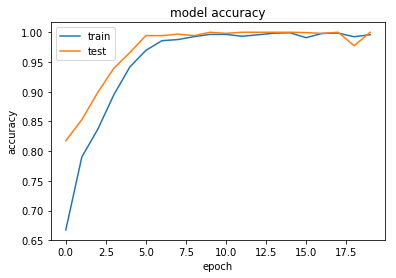

In [433]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save weights

In [434]:
model.save_weights('TrainedModel_V12_50Epochs.h5')
model_json = model.to_json()
with open("TrainedModel.json", "w") as json_file:
    json_file.write(model_json)

In [276]:
import requests
API_KEY = 'fd95dd65829a42dea7dfcc8cc9b9fa02'
MAX_RESULTS = 1001
GROUP_SIZE = 100

In [395]:
bingArr = []

In [401]:
bingArr = []
for i in range(0,20):
    headers = {"Ocp-Apim-Subscription-Key" : API_KEY}
    params = {"q": 'injury blood', "offset": i, "count": GROUP_SIZE}
    search = requests.get(URL, headers=headers, params=params)
    search.raise_for_status()
    results = search.json()
    bingArr.append(results)

In [402]:
len(bingArr)

20

In [403]:
search = requests.get(URL, headers=headers, params=params)
search.raise_for_status()

In [404]:
results = search.json()

In [405]:
import urllib.request
counter = 0
for res in bingArr:
    print(counter)
    for i in range(0,len(res["value"]) - 1):

        
        urllib.request.urlretrieve(results["value"][i]["thumbnailUrl"], "/Users/ajinkya.parkar@ibm.com/Documents/deep/ImageDetection/ImageData/CrisisMMD_v1.0/data_image/blood/"+str(i)+str(counter)+".jpg")
        counter +=1


0
99
198
297
396
495
594
693
792
891
990
1089
1188
1287
1386
1485
1584
1683
1782
1881
